### Diabetes Prediction 
    
Diabetes is a chronic metabolic disorder characterized by elevated blood sugar levels, resulting from the body's inability to produce or effectively use insulin. Insulin is a hormone produced by the pancreas that plays a crucial role in converting glucose from food into energy. When this process is disrupted, it can lead to various health complications.


### INDEX:-

**1. Importing Required Libraries**

**2. Loading DataSet**

**3. Exploratory Data Analysis**

a. Understanding the dataset

b. Data Cleaning

**4.Data Visualization**

**5.Feature Selection**

**6.Handling Outliers**

**7.Split the DataFrame into X and y**

**8. TRAIN TEST SPLIT**

**9. Build the Classification Algorithm**

a) KNN

b) Naive Bayes

c) SVM

d) Random Forest

e) Logistic regression

### The Model Includes:

a) Hyper parameter tuning using Gridsearch CV

b) Fit best model

c) predict on testing data using that model

d) Performance Metrics:- Confusion Matrix, F1 Score, Precision Score, Recall Score



 ### 1) IMPORTING REQUIRED LIBRARIES

In [202]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2) Loading the Dataset

In [10]:
df = pd.read_csv("diabetes.csv")

### 3) Exploratory Data Analysis

### a) Understanding The Dataset

In [14]:
#Head of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#SHAPE OF THE DATASET:
df.shape

(768, 9)

In [18]:
#type of columns:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
#type of  Dataset:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [22]:
#information about Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
#SUMMARY OF DATASET:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### b) DATA CLEANING

In [27]:
#dropping duplicate null values:
df =df.drop_duplicates()

In [29]:
#check for missing values:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
#Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.
#checking for 0 values in 5 columns
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [33]:
#replacing 0 values with median of that column:
df['Glucose'] =df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())

### 4) DATA VISUALIZATION

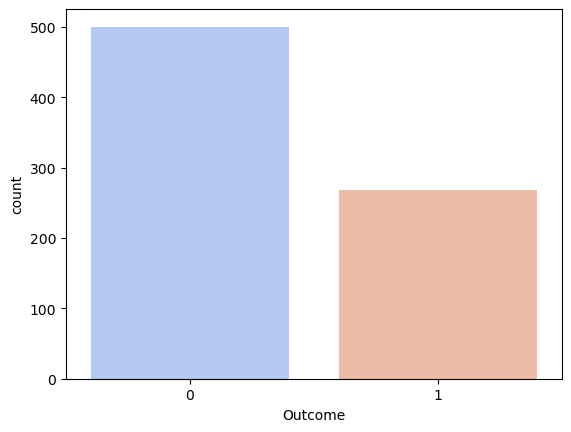

In [36]:
#count plot:
sns.countplot(x = 'Outcome', data = df, palette = "coolwarm")
plt.show()

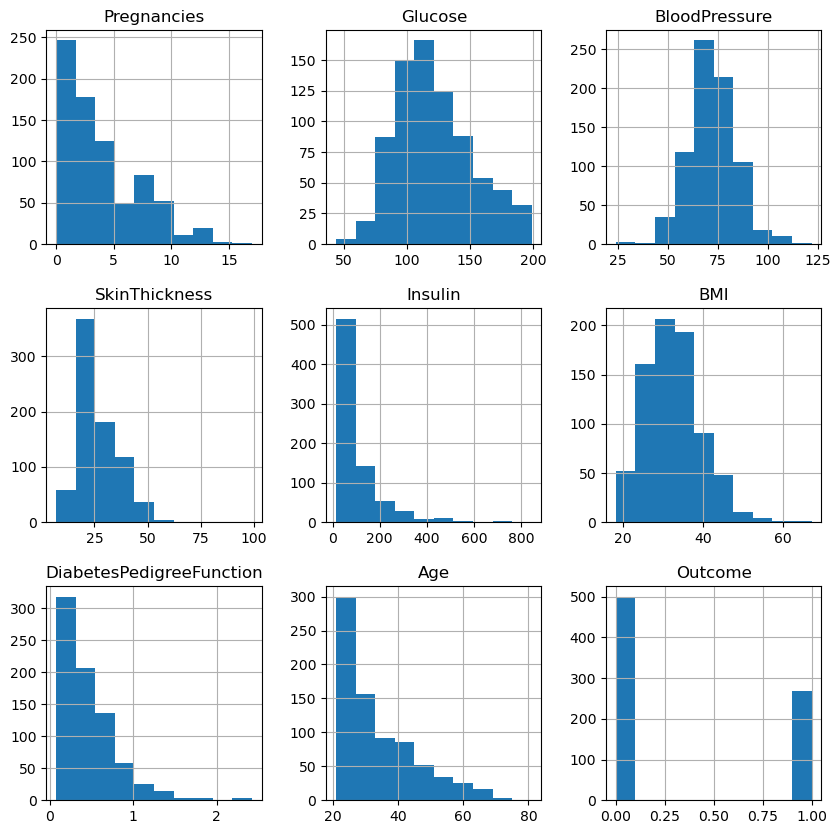

In [38]:
#histogram for each features:
df.hist(bins=10, figsize=(10,10))
plt.show()

**Conclusion :- We observe that only glucose and Blood Pressure 
are normally distributed rest others are skewed and have outliers**

<Axes: xlabel='DiabetesPedigreeFunction'>

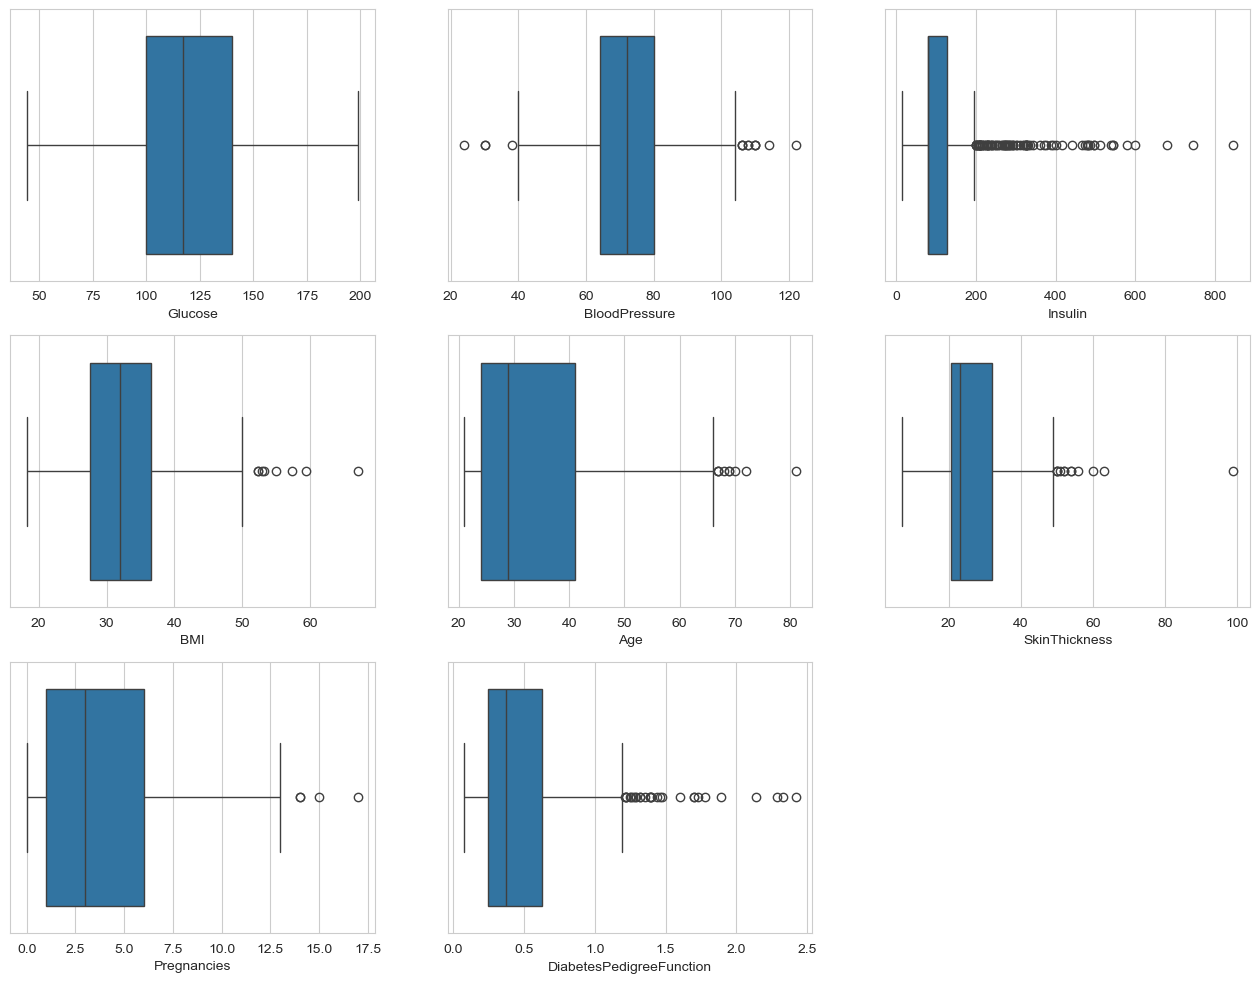

In [41]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

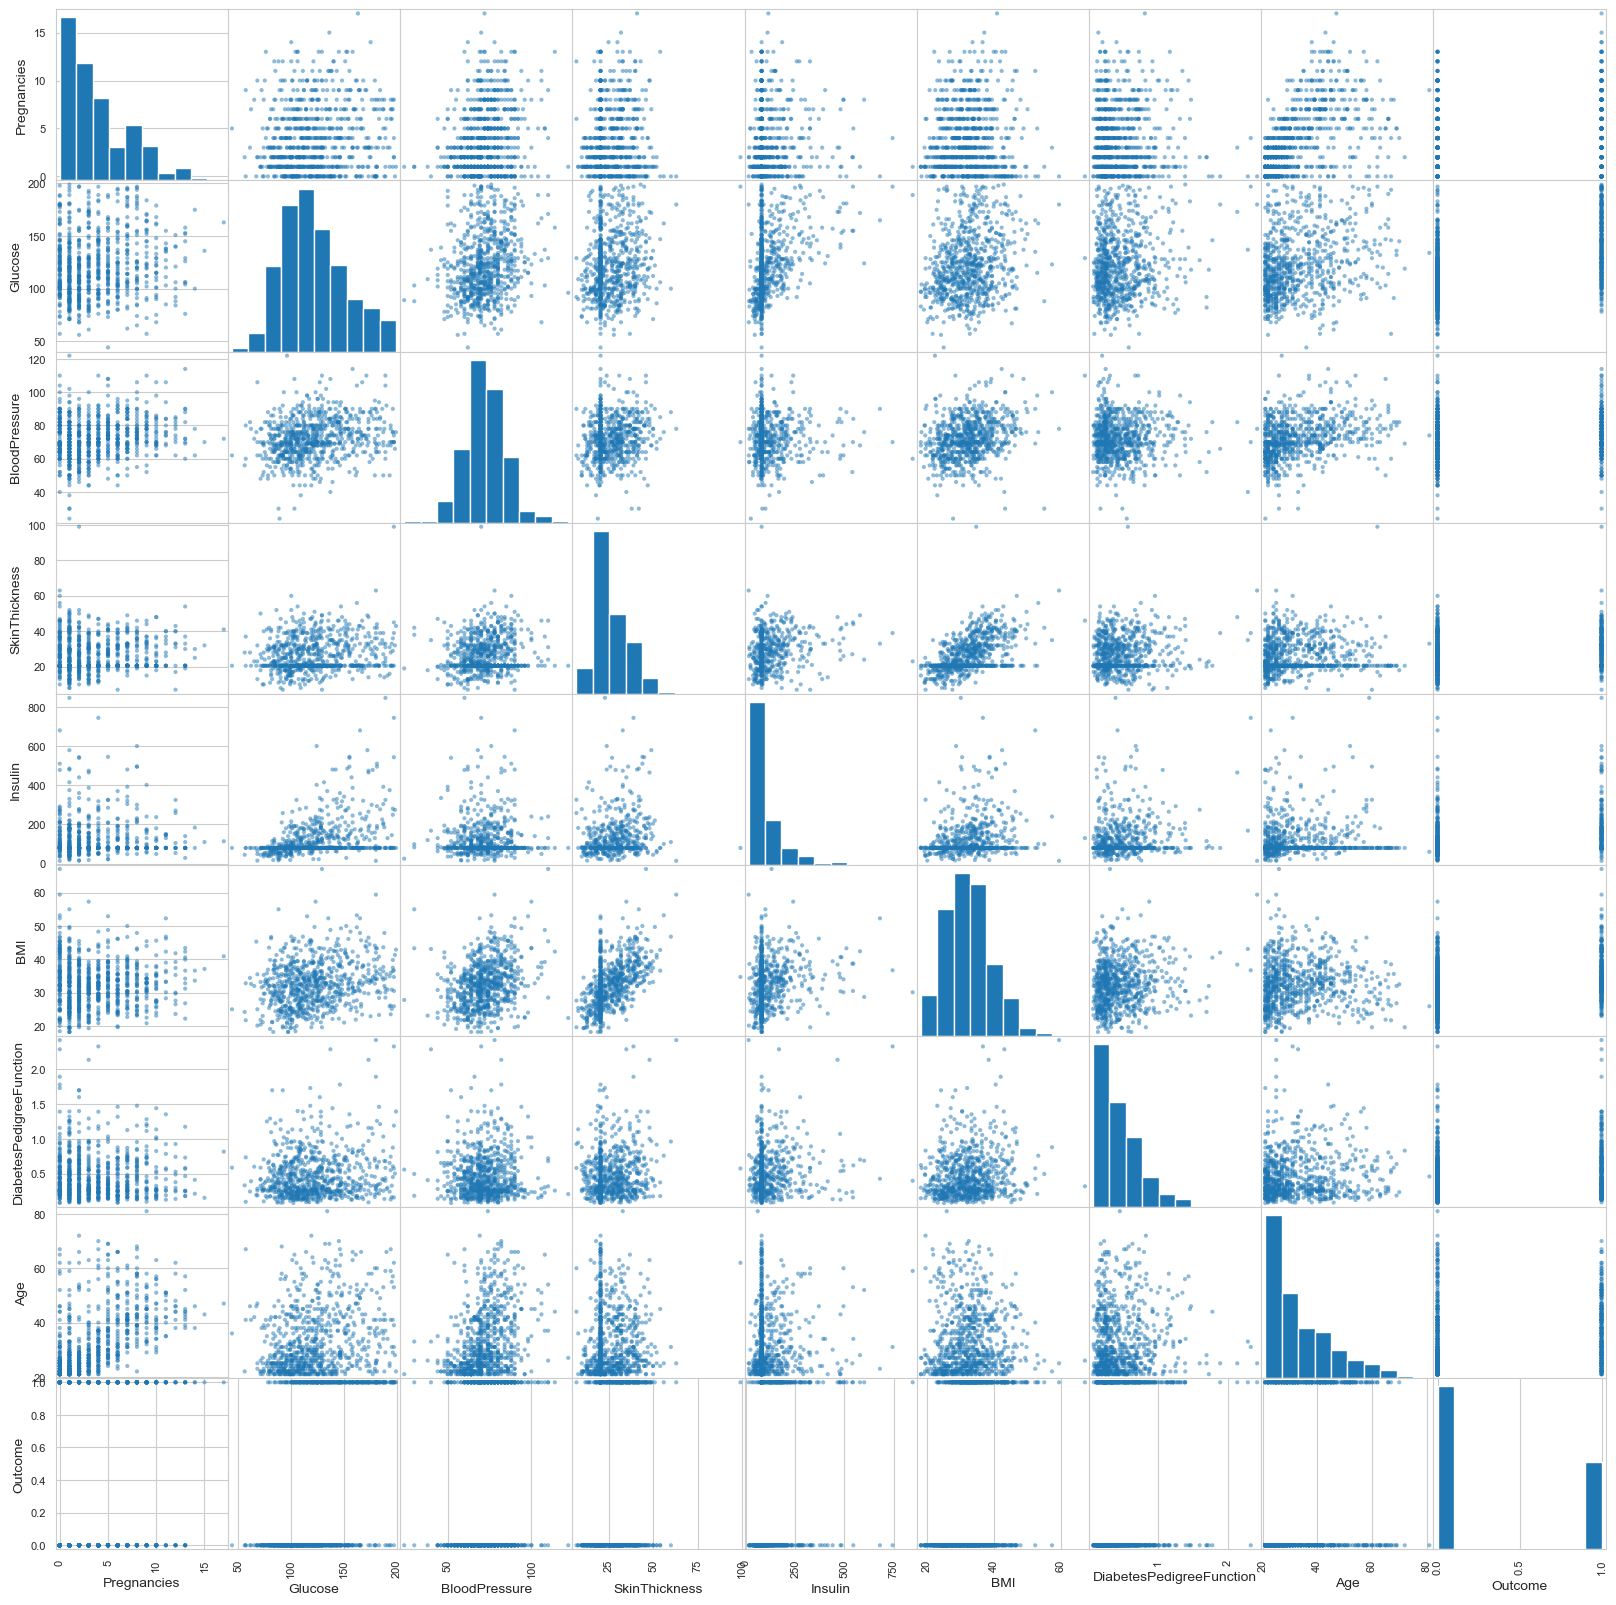

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

### 5) FEATURE SELECTION

<Axes: >

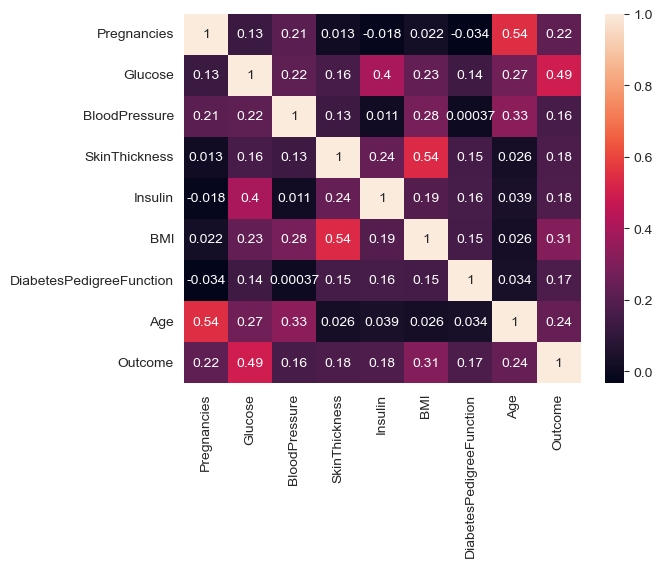

In [46]:
#Pearson's Correlation Coefficient :
corrmat = df.corr()
sns.heatmap(corrmat, annot = True)

**Helps to find out the relationship between two quantities. 
It gives the measure of the strength of association between two variables.
The value of Pearsons Correlation Coefficient can be between -1 to +1.
1 means that they are highly correlated and 0 means no correlation.**


** Observe the last row 'Outcome' and note its correlation scores with different features. 
We can observe that Glucose, BMI and Age are the most correlated with Outcome. 
BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated**



In [50]:
# hence they don't contribute much to the model so we can drop them.
df_selected =df.drop(['BloodPressure', 'Insulin','DiabetesPedigreeFunction'], axis ='columns')

### 6) Handling Outlier

In [53]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.308996,0.077575,0.585398,1.0
3,0.232725,0.124511,0.505867,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

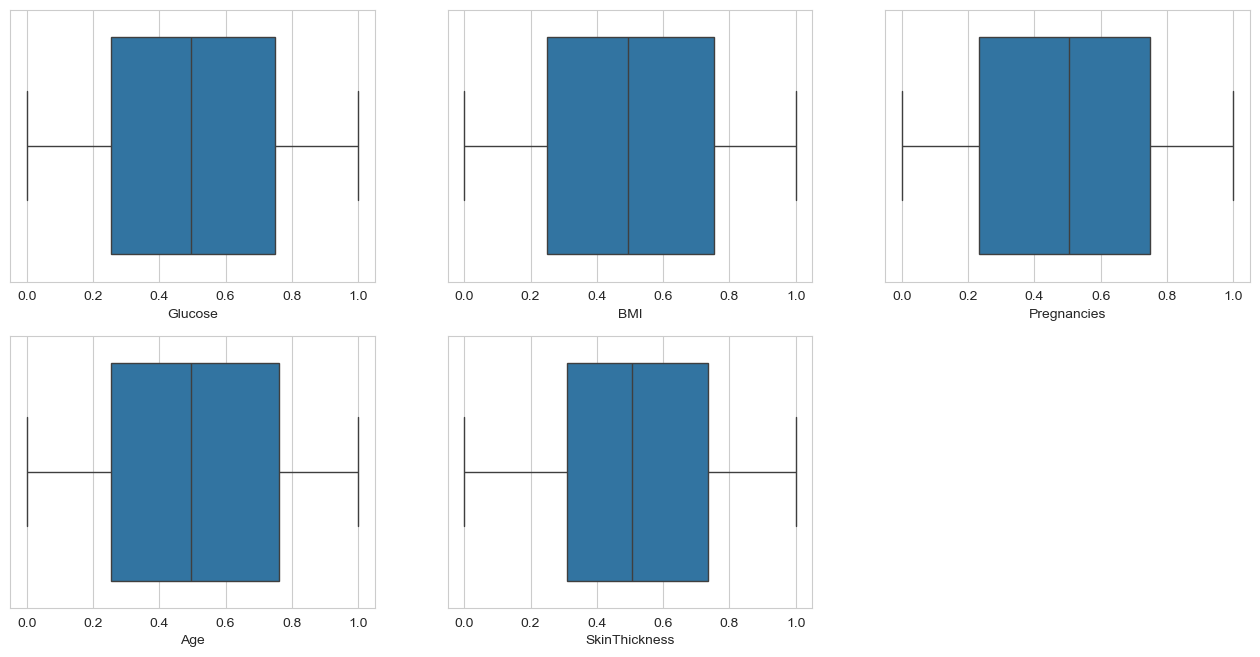

In [55]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)

plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)

plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)

plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)

plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

### 7) Split The Data Frame into X & y

In [58]:
target_name = 'Outcome'
y = df_new[target_name]  #training data - given predictions
X =df_new.drop(target_name, axis =1)  #droppig the outcome column & keeping all other column as x


In [60]:
#contains only independent features
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.308996,0.077575,0.585398
3,0.232725,0.124511,0.505867,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [62]:
#contains dependent feature
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

### 8) TRAIN TEST SPLIT

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
#splitting data in 80% train, 20% test

In [67]:
X_train.shape, y_train.shape

((614, 5), (614,))

In [69]:
X_test.shape, y_test.shape

((154, 5), (154,))

### 9) CLASSIFICATION ALGORITHM

### a) KNN (K Nearest Neighbours):-

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [132]:
#list hyperparameters to tune
knn =KNeighborsClassifier()
n_neighbors = list(range(15,25))
p = [1,2]
weights =['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']


In [134]:
#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [136]:
best_model = grid_search.fit(X_train,y_train)

In [138]:
# best hyper parameters value:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 17


In [140]:
#predicting testing set:
knn_pred = best_model.predict(X_test)

### b) Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb ={'var_smoothing': np.logspace(0,-2, num =100)}
nbModel_grid = GridSearchCV(estimator =GaussianNB(), param_grid = param_grid_nb,verbose =1, cv =10, n_jobs=-1)

In [145]:
best_model = nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [146]:
nb_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154


 F1:
 0.5977011494252874

 Precision score is:
 0.65

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



<Axes: >

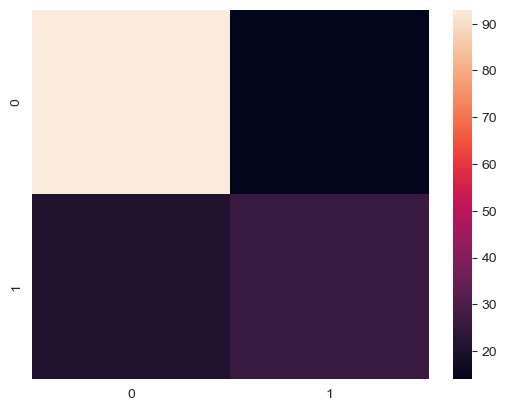

In [149]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

### C)SUPPORT VECTOR MACHINE(SVM):-

In [152]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [154]:
model = SVC()
kernel = ['ploy', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [156]:
#define grid search
grid = dict(kernel = kernel, C = C, gamma = gamma)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats =3, random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=-1, cv =cv, scoring='f1', error_score=0)


In [158]:
grid_result = grid_search.fit(X, y)

In [160]:
svm_pred = grid_result.predict(X_test)

Classification Report is: 
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       107
         1.0       0.73      0.70      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154


 F1:
 0.6744186046511628

 Precision score is: 
 0.7435897435897436

 Recall score is:
 0.6170212765957447

 Confusion matrix:



<Axes: >

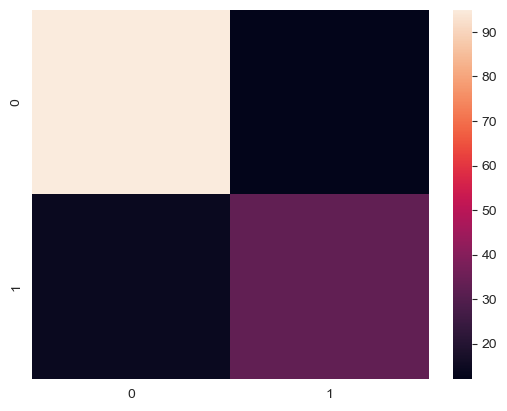

In [162]:
print("Classification Report is: \n", classification_report(y_test, svm_pred))
print('\n F1:\n', f1_score(y_test, knn_pred))
print("\n Precision score is: \n", precision_score(y_test, knn_pred))
print('\n Recall score is:\n', recall_score(y_test, knn_pred))
print("\n Confusion matrix:\n")
sns.heatmap(confusion_matrix(y_test, svm_pred))

### C) Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [167]:
#create the parameter grid based on the results of random search
params ={
    'max_depth': [5, 10, 20, 25],
    'min_samples_leaf': [10, 20, 50, 100, 120],
    'criterion': ['gini', 'entropy']
}

In [169]:
grid_search = GridSearchCV(estimator = dt,
                          param_grid = params,
                          cv=4, n_jobs=-1, scoring ='accuracy')

In [171]:
best_model = grid_search.fit(X_train, y_train)

In [173]:
dt_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion_matrix:



<Axes: >

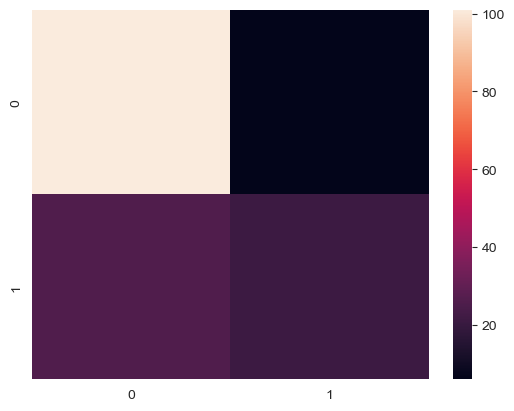

In [175]:
print("Classification Report is:\n", classification_report(y_test, dt_pred))
print("\n F1:\n", f1_score(y_test, dt_pred))
print("\n Precision score is:\n", precision_score(y_test, dt_pred))
print('\n Recall score is:\n', recall_score(y_test, dt_pred))
print('\n Confusion_matrix:\n')
sns.heatmap(confusion_matrix(y_test, dt_pred))

### d)Random forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [180]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [182]:
#define grid search
grid = dict(n_estimators = n_estimators, max_features = max_features)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats =3, random_state =1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs = -1, cv =cv , scoring = 'accuracy', error_score=0)

In [184]:
best_model =grid_search.fit(X_train, y_train)

In [185]:
rf_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       107
         1.0       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6744186046511628

 Precision score is:
 0.7435897435897436

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



<Axes: >

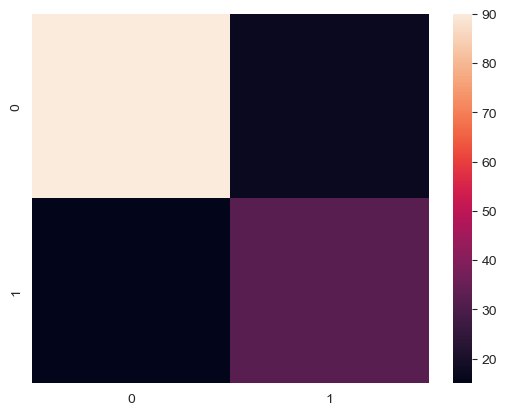

In [188]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

### e) Logistic regression:-


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [193]:
reg = LogisticRegression()
reg.fit(X_train,y_train)                         

LogisticRegression()

In [195]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       107
         1.0       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.611764705882353

 Precision score is:
 0.6842105263157895

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



<Axes: >

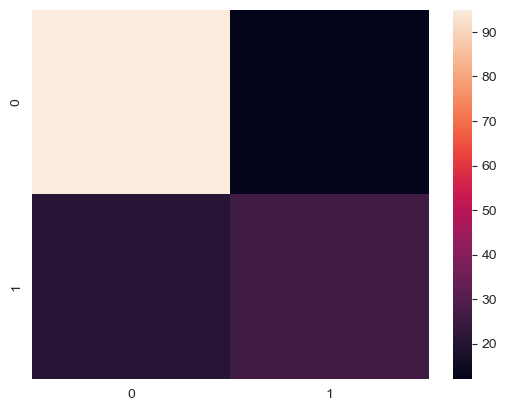

In [197]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

### conclusion :-

The application of machine learning in predicting diabetes has shown significant promise in enhancing early diagnosis and improving patient outcomes. Through the analysis of diverse datasets and the implementation of various algorithms, we have developed models capable of identifying individuals at risk of developing diabetes with commendable accuracy.

In conclusion, leveraging machine learning for diabetes prediction represents a transformative approach in healthcare. By empowering individuals with knowledge about their risk, we can foster preventive measures, reduce healthcare costs, and ultimately improve quality of life for those at risk of diabetes. This project lays the groundwork for future research and development in this vital area of health management.



